In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def show(data):
    if(len(data.shape) == 4):
        data = data[0]
    
    plt.imshow(data, cmap="gray")
    plt.show()

# Test Data
Numpy array with zeroes and one distinct pattern

data shape: (1, 10, 10, 1)


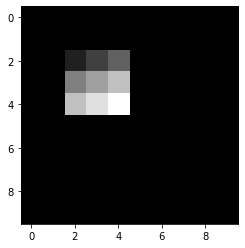

In [21]:
data = np.zeros((10, 10))

data[2:5, 2:5] = [[1, 2, 3], [4, 5, 6], [6, 7, 8]]
data = data.reshape(1, 10, 10, 1)

print(f"data shape: {data.shape}")
show(data)

In [22]:
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, GlobalMaxPooling2D, GlobalAveragePooling2D

In [53]:
def testLayer(pooling, inputs, name, layer_multi=1):

    
    fig, axs = plt.subplots(nrows = layer_multi, ncols = 4, figsize = (15, 15))
    if(layer_multi == 1):
        layer_1 = pooling(inputs)
        layer_2 = pooling(layer_1)    
        layer_3 = pooling(layer_2)     
        
        axs[0].set_title(name)
        axs[0].imshow(inputs[0], cmap="gray")
        axs[1].imshow(layer_1[0], cmap="gray")
        axs[2].imshow(layer_2[0], cmap="gray")
        axs[3].imshow(layer_3[0], cmap="gray")
        plt.show()
    else:
        axs[0, 0].set_title(name)
        for row in range(layer_multi):
            layer_1 = pooling(inputs)
            layer_2 = pooling(layer_1)    
            layer_3 = pooling(layer_2)    
            
            
            axs[row, 0].imshow(inputs[0], cmap="gray")
            axs[row, 1].imshow(layer_1[0], cmap="gray")
            axs[row, 2].imshow(layer_2[0], cmap="gray")
            axs[row, 3].imshow(layer_3[0], cmap="gray")
            
            inputs = layer_3
            
        plt.show()

# Max pooling
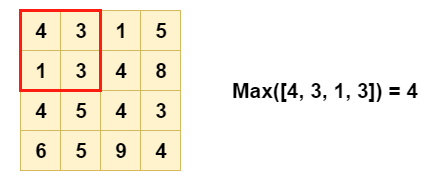

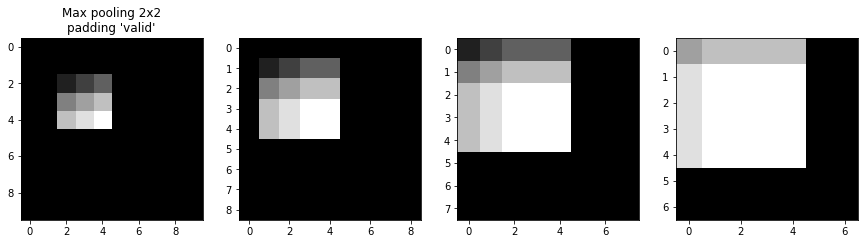

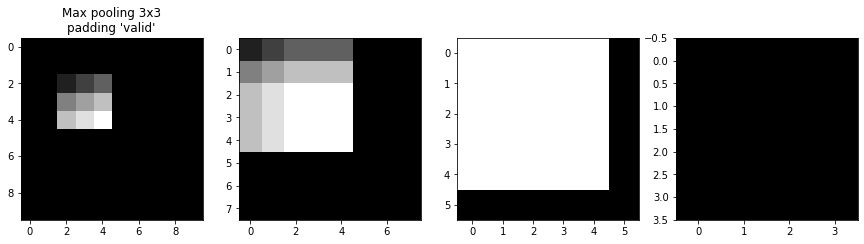

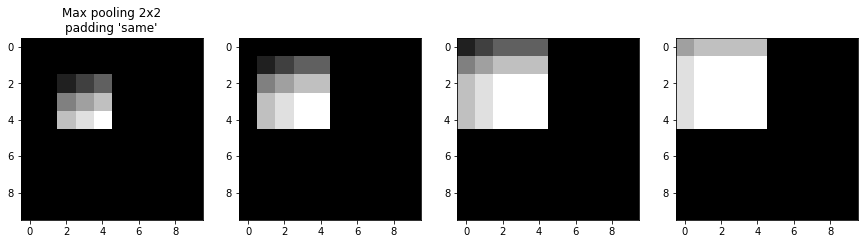

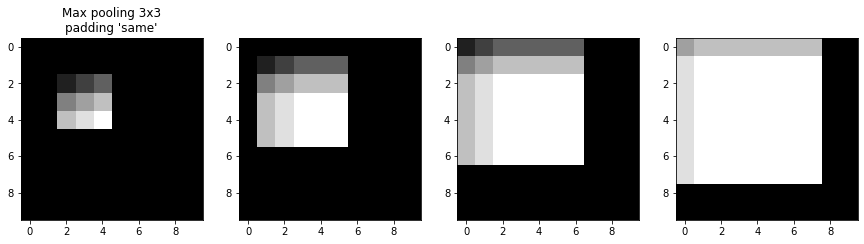

In [54]:
testLayer(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding="valid", autocast=False), 
          data, 
          "Max pooling 2x2\npadding 'valid'")

testLayer(MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding="valid", autocast=False), 
          data, 
          "Max pooling 3x3\npadding 'valid'")

testLayer(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding="same", autocast=False), 
          data, 
          "Max pooling 2x2\npadding 'same'")

testLayer(MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding="same", autocast=False), 
          data, 
          "Max pooling 3x3\npadding 'same'")

# Average pooling
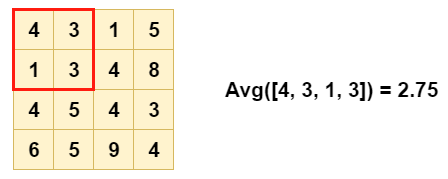

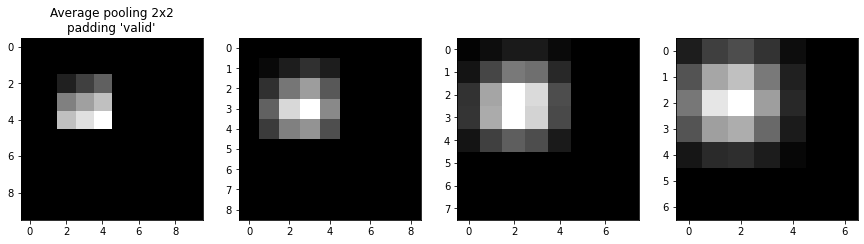

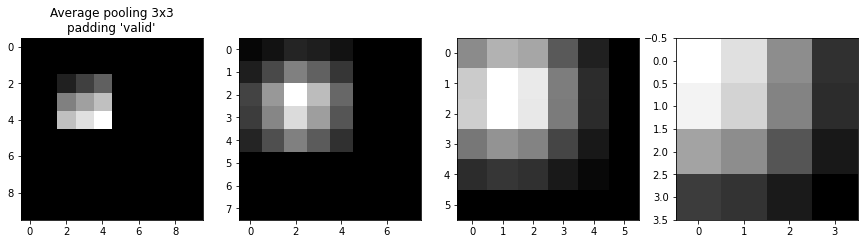

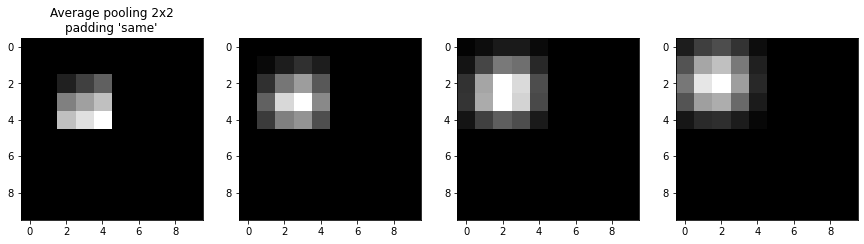

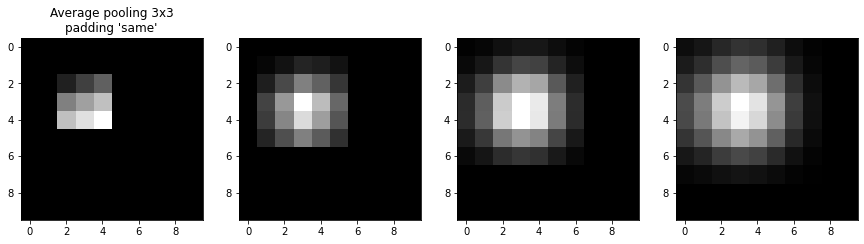

In [55]:
testLayer(AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding="valid", autocast=False), 
          data, 
          "Average pooling 2x2\npadding 'valid'")

testLayer(AveragePooling2D(pool_size=(3, 3), strides=(1, 1), padding="valid", autocast=False), 
          data, 
          "Average pooling 3x3\npadding 'valid'")

testLayer(AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding="same", autocast=False), 
          data, 
          "Average pooling 2x2\npadding 'same'")

testLayer(AveragePooling2D(pool_size=(3, 3), strides=(1, 1), padding="same", autocast=False), 
          data, 
          "Average pooling 3x3\npadding 'same'")

# Example

In [56]:
import cv2
import os
DATADIR = "dataset_generator/images/"
img_array = cv2.imread(os.path.join(DATADIR, "1.jpg")) # cv2.IMREAD_GRAYSCALE
img_array = cv2.resize(img_array, (100, 100))
img_data = (np.array(img_array).reshape(1, 100, 100, 3).astype(float)) # - np.mean(img_data)) / np.std(img_data)
img_data = img_data[0][:,:,2].reshape(1, 100, 100, 1).astype(float)

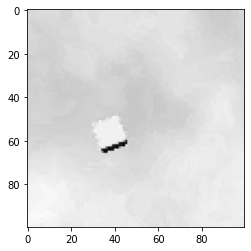

In [57]:
show(img_data)

# Average pooling

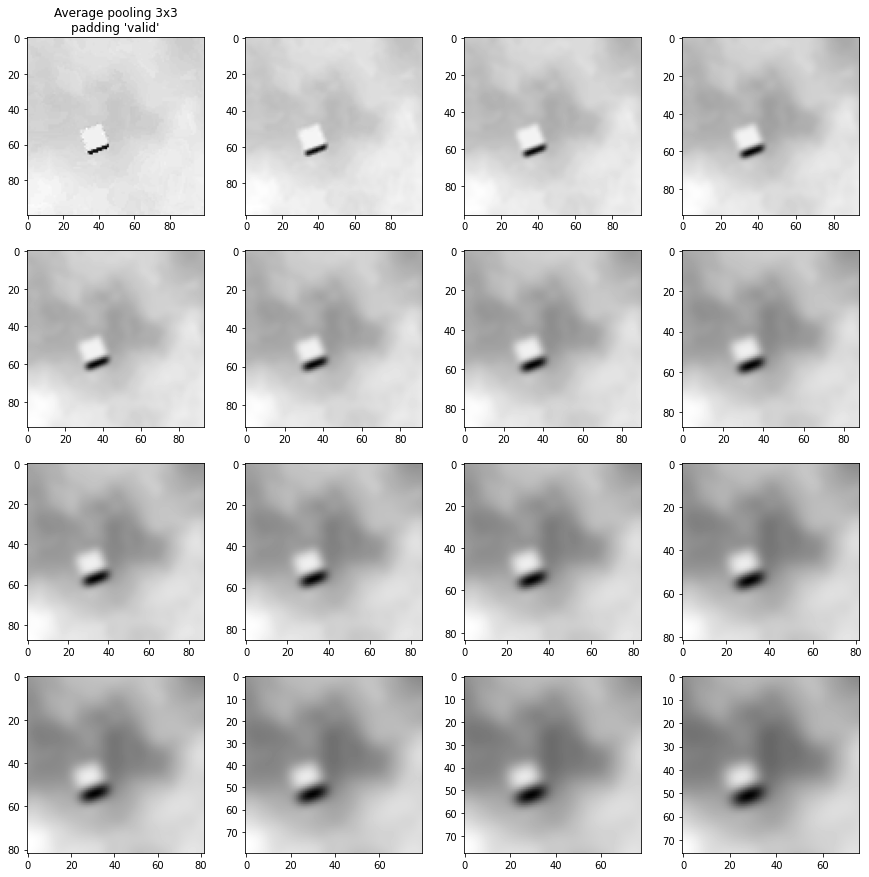

In [58]:
pooling = AveragePooling2D(pool_size=(3, 3), strides=(1, 1), padding="valid", autocast=False)

testLayer(pooling, 
          img_data, 
          "Average pooling 3x3\npadding 'valid'",
         layer_multi=4)

# Max pooling

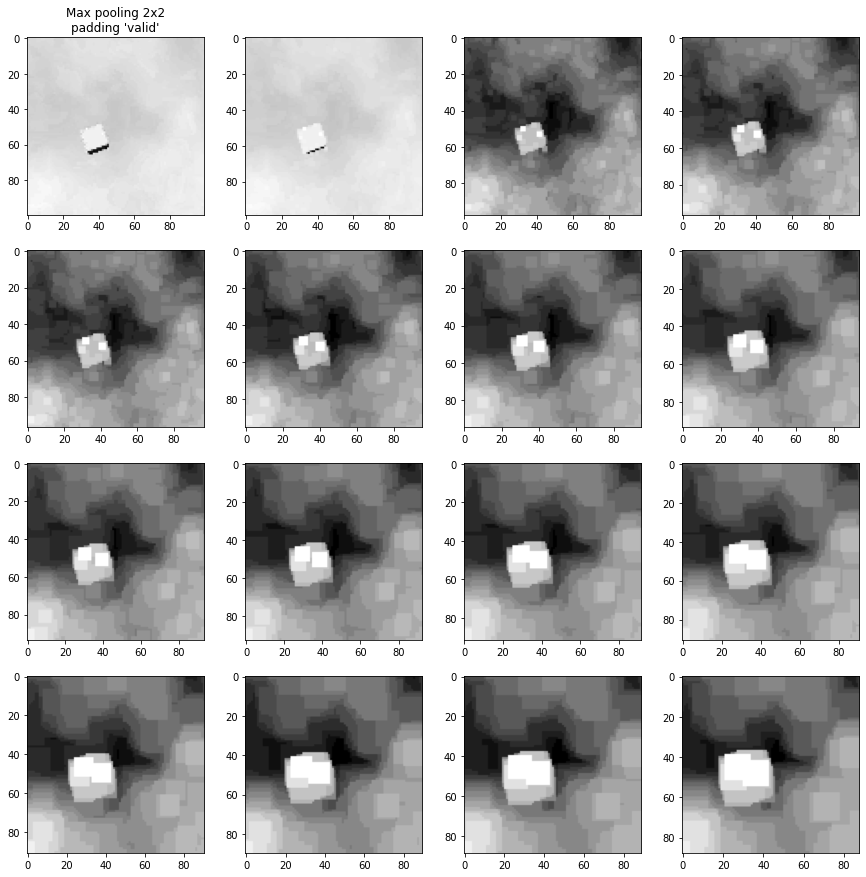

In [59]:
pooling = MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding="valid", autocast=False)

testLayer(pooling, 
          img_data, 
          "Max pooling 2x2\npadding 'valid'",
         layer_multi=4)